In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler

In [271]:
train_data = pd.read_csv("aug_train.csv", delimiter = ",")
test_data = pd.read_csv("aug_test.csv", delimiter = ",")

#Maybe if I'm feeling adventurous I could combine test and train to create one big dataset. Then split it again to create a new test/train set

In [ ]:
test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [272]:
print(train_data["company_type"])

0                   NaN
1               Pvt Ltd
2                   NaN
3               Pvt Ltd
4        Funded Startup
              ...      
19153               NaN
19154               NaN
19155           Pvt Ltd
19156           Pvt Ltd
19157               NaN
Name: company_type, Length: 19158, dtype: object


Important to note: 32% of the company type responses are missing values. Why might this be? Maybe some people don't know what kind of company they work for (which is crazy), maybe others have NDAs so they can't specify. Regardless that's too much data to ignore so dummy_na is True for get_dummies.

Additionally, 31% of the responses for company size are missing, likely for similar reasons as company type.

24% of respondents didn't select anything for the gender question, pretty sure they know their own gender though. 

In [134]:
#show correlations of relevant info first


I want to create a correlation matrix to determine how the variables are related. I'm working to create a classification model that can accurately predict if people are looking for a job change or not. I should look at each factor and determine how they are correlated to each other. Maybe also see if they are correlated to the target at all

In [273]:
#train_no_city = train_data.drop("city", axis = 1)
(train_data["target"] == False).sum()


14381

In [220]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


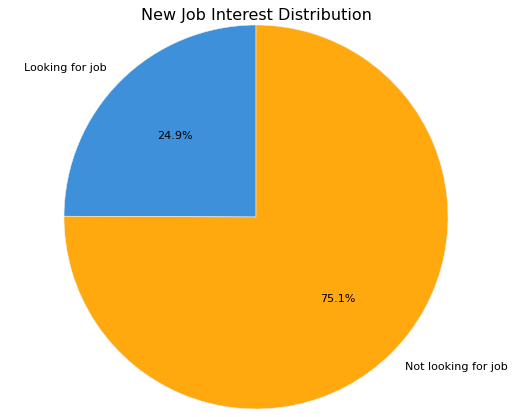

<Figure size 2400x1800 with 0 Axes>

In [274]:
labels = ["Looking for job", "Not looking for job"]
Job_Change = train_data["target"].sum()
No_Job_Change = (train_data["target"] == False).sum()

counts = [Job_Change, No_Job_Change]

plt.pie(counts, labels=labels, autopct='%.1f%%', startangle=90)
plt.title("New Job Interest Distribution")
plt.axis('equal')  # Equal aspect ratio makes the pie circular
plt.figure(dpi = 300)
plt.show()

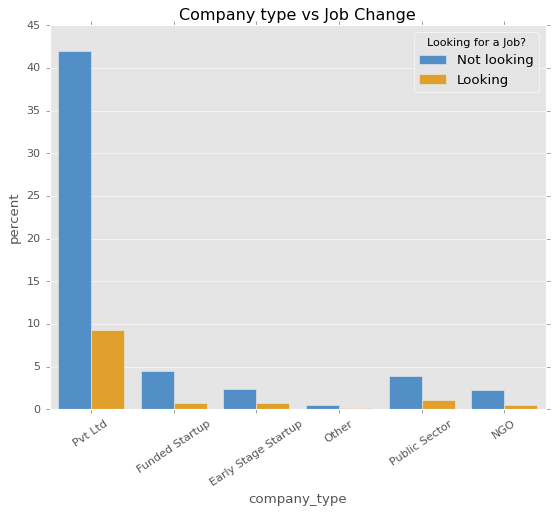

<Figure size 2400x1800 with 0 Axes>

In [275]:
sns.countplot(x='company_type', hue='target', stat= "percent" ,data=train_data)
plt.title("Company type vs Job Change")
plt.legend(title = "Looking for a Job?", labels = ["Not looking","Looking"] )
plt.xticks(rotation=34)
plt.figure(dpi = 300)
plt.show()

<Figure size 2400x1800 with 0 Axes>

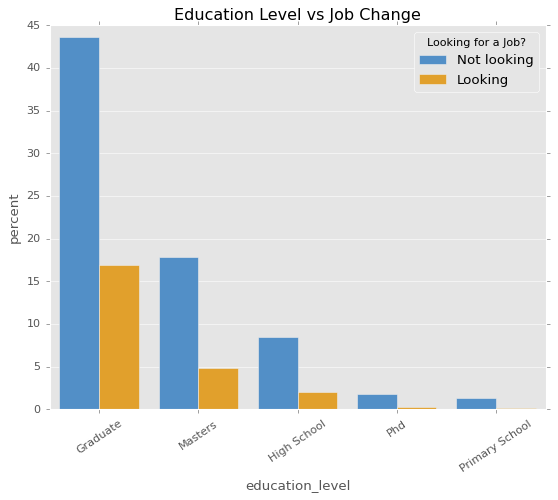

<Figure size 2400x1800 with 0 Axes>

In [277]:
sns.countplot(x='education_level', hue='target', stat="percent", data=train_data)
plt.title("Education Level vs Job Change")
plt.legend(title = "Looking for a Job?", labels = ["Not looking","Looking"] )
plt.xticks(rotation=34)
plt.figure(dpi = 300)


In [187]:
"""
sns.lineplot(x='training_hours', hue='target', data=train_data)
plt.title("Training Hours vs Job Change")
plt.xticks(rotation=34)
"""

'\nsns.lineplot(x=\'training_hours\', hue=\'target\', data=train_data)\nplt.title("Training Hours vs Job Change")\nplt.xticks(rotation=34)\n'

<Axes: xlabel='training_hours', ylabel='Density'>

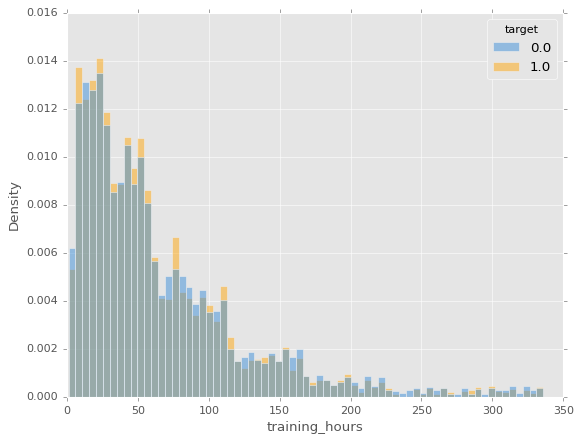

In [278]:
sns.histplot(data=train_data, x='training_hours', hue='target', stat='density', common_norm=False)

In [279]:
#City code is removed currently because it more than doubles the amount of columns in the dataset after get_dummies is called

train_dummies = pd.get_dummies(train_data, dummy_na= True)

labels = train_dummies["target"]
train_dummies.drop(["target","relevent_experience_nan","enrollee_id"], axis = 1,inplace = True)
x_train, x_test, y_train, y_test = train_test_split(train_dummies, labels, test_size = 0.2, random_state = 21)

In [137]:
train_dummies

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_Public Sector,company_type_Pvt Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,last_new_job_nan
0,0.920,36,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False
1,0.776,47,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,0.624,83,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.789,52,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0.767,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
19154,0.920,52,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
19155,0.920,44,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
19156,0.802,97,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False


In [138]:
#remove irrelevant columns
#train_dummies.drop("relevent_experience_nan", axis = 1, inplace=True)

In [139]:
train_dummies.dtypes

city_development_index    float64
training_hours              int64
city_city_1                  bool
city_city_10                 bool
city_city_100                bool
                           ...   
last_new_job_3               bool
last_new_job_4               bool
last_new_job_>4              bool
last_new_job_never           bool
last_new_job_nan             bool
Length: 195, dtype: object

In [ ]:
scaler = MinMaxScaler()

#normalize training, validation, test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [280]:
rf_model = RandomForestClassifier(bootstrap=True, class_weight="balanced")

In [141]:
#X =  train_dummies.astype(np.float32, copy=False)

In [247]:
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_train)

In [190]:
y_test

11288    0.0
13468    0.0
13993    0.0
14991    0.0
8670     1.0
        ... 
9512     0.0
7295     0.0
521      1.0
2270     0.0
4740     0.0
Name: target, Length: 3832, dtype: float64

In [261]:
#Determining the accuracy of the model: How accurate is it in predicting people that would leave?
hr_probs = rf_model.predict_proba(x_train)
hr_probs = hr_probs[:, 1]

threshold = 0.50
preds = (hr_probs >= threshold).astype(y_train.dtype)

hr_acc = np.mean(preds == y_train)
base_rate = np.mean(y_train)
rel_acc = np.abs((1 - base_rate) - hr_acc) * 100

print(f"Model Accuracy: {hr_acc:.2f}")
print(f"Model Relative Accuracy: {rel_acc:.2f}%")

Model Accuracy: 1.00
Model Relative Accuracy: 24.83%


In [150]:
hr_probs

array([0.15, 0.07, 0.7 , ..., 0.86, 0.02, 0.22])

In [244]:
hr_probs = rf_model.predict_proba(x_test)
hr_probs = hr_probs[:, 1]

threshold = 0.50
preds = (hr_probs >= threshold).astype(y_test.dtype)

hr_acc = np.mean(preds == y_test)
base_rate = np.mean(y_test)
rel_acc = np.abs((1 - base_rate) - hr_acc) * 100

print(f"Model Accuracy: {hr_acc:.2f}")
print(f"Model Relative Accuracy: {rel_acc:.2f}%")

Model Accuracy: 0.78
Model Relative Accuracy: 2.90%


In [152]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

x_train shape: (15326, 195)
y_train shape: (15326,)
x_test shape: (3832, 195)
y_test shape: (3832,)
y_pred shape: (15326,)


In [308]:
train_results = (x_train.sum(axis=1) >= 6).astype(y_train.dtype)
train_cm = confusion_matrix(y_pred, y_train, normalize = "true")
print(train_cm)

[[9.99651932e-01 3.48068221e-04]
 [3.91236307e-03 9.96087637e-01]]


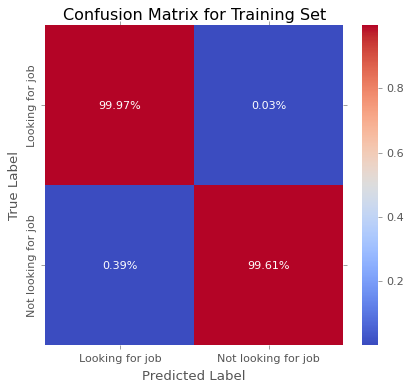

In [313]:
labels = ["Looking for job", "Not looking for job"]

plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt='.2%', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Training Set')
plt.show()

In [211]:
feature_importances = rf_model.feature_importances_

In [212]:
Feature_Importances = pd.DataFrame({
    'Feature': train_dummies.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top20 = Feature_Importances.iloc[:20, ]

In [213]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11503
         1.0       1.00      1.00      1.00      3823

    accuracy                           1.00     15326
   macro avg       1.00      1.00      1.00     15326
weighted avg       1.00      1.00      1.00     15326



In [214]:
top20


,Feature,Importance
1,training_hours,0.140614
0,city_development_index,0.115341
66,city_city_21,0.050121
187,company_type_nan,0.034181
180,company_size_nan,0.033701
186,company_type_Pvt Ltd,0.020500
188,last_new_job_1,0.018202
136,education_level_Graduate,0.015902
127,gender_Male,0.014345
7,city_city_103,0.013422


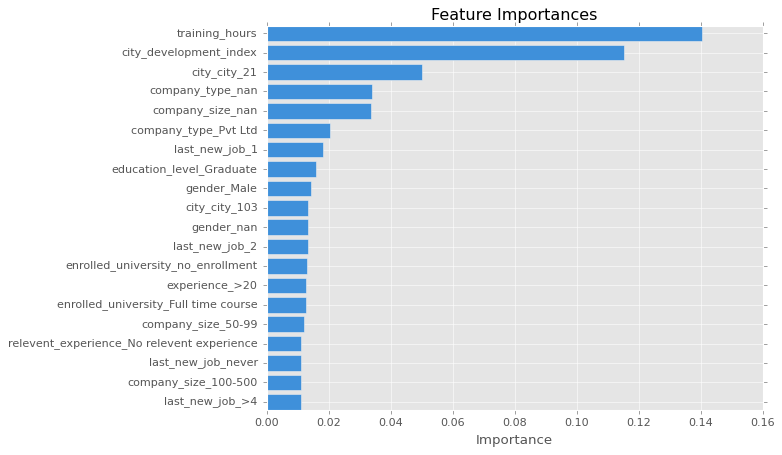

<Figure size 2400x1800 with 0 Axes>

In [ ]:
plt.barh(top20["Feature"], top20["Importance"])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.figure(dpi = 300)
plt.show()

In [292]:
rf_model.fit(x_train, y_train)
y_pred_test = rf_model.predict(x_test)

In [293]:
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [297]:
hr_probs = rf_model.predict_proba(x_test)
hr_probs = hr_probs[:, 1]

threshold = 0.50
preds = (hr_probs >= threshold).astype(y_test.dtype)

hr_acc = np.mean(preds == y_test)
base_rate = np.mean(y_test)
rel_acc = np.abs((1 - base_rate) - hr_acc) * 100

print(f"Model Accuracy: {hr_acc:.2f}")
print(f"Model Relative Accuracy: {rel_acc:.2f}%")

Model Accuracy: 0.78
Model Relative Accuracy: 2.58%


In [314]:
test_results = (x_test.sum(axis=1) >= 6).astype(y_test.dtype)
test_cm = confusion_matrix(y_pred_test, y_test, normalize = "true")
print(test_cm)

[[0.82322746 0.17677254]
 [0.43636364 0.56363636]]


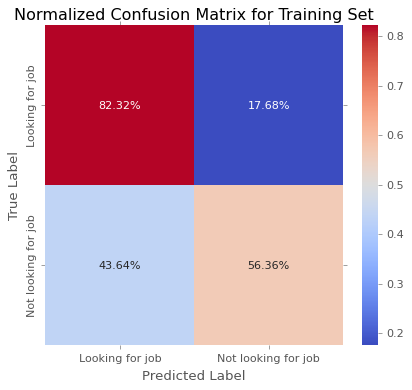

In [317]:
labels = ["Looking for job", "Not looking for job"]

plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt='.2%', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for Training Set')
plt.show()

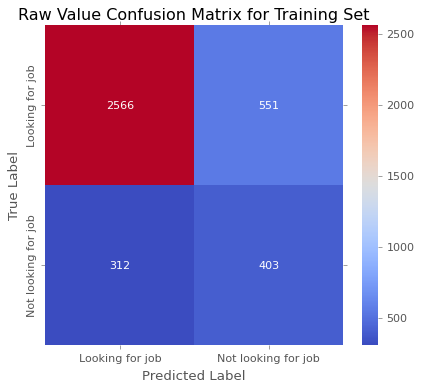

In [321]:
test_cm = confusion_matrix(y_pred_test, y_test)

labels = ["Looking for job", "Not looking for job"]

plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt = "d", cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Raw Value Confusion Matrix for Training Set')
plt.show()

Accuracy: (2566+403)/(2566+551+312+403) = 2969/3832 = .7748. roughly 77% accuracy
Precision: 2566/(2566+312) = 2566/2878 = 0.8916
Recall: 2566/(2566+551) = 2566/3117 = 0.8232
F1-Score:2*((0.89*0.82) / (0.89+0.82)) = 2*(0.7298/1.71) = 2*0.42678 = 0.85

### Some Metrics Derived from the Confusion Matrix:
- **Accuracy**: The overall correctness of the model.
$$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Precision**: The proportion of positive predictions that are actually correct.
$$
  \text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (Sensitivity)**: The proportion of actual positives that are correctly identified.
$$
  \text{Recall} = \frac{TP}{TP + FN}
$$

- **F1-Score**: The harmonic mean of precision and recall.
$$
  \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

# Neural Network Wait don't do this yet you haven't normalized the data. There's a lot more cleaning to do before you run a neural network model!

In [300]:

hr_nn = tf.keras.Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

In [302]:
hr_nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [303]:
history = hr_nn.fit(x=x_train, y=y_train, batch_size=32, epochs=50)

Epoch 1/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7349 - loss: 0.6012
Epoch 2/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7800 - loss: 0.4741
Epoch 3/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7827 - loss: 0.4698
Epoch 4/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7855 - loss: 0.4581
Epoch 5/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7944 - loss: 0.4415
Epoch 6/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7958 - loss: 0.4364
Epoch 7/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8028 - loss: 0.4279
Epoch 8/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8035 - loss: 0.4257
Epoch 9/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8076 - loss: 0.4191
Epoch 10/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8075 - loss: 0.4195
Epoch 11/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8056 - loss: 0.4157
Epoch 12/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [304]:
hr_model_test_probs = hr_nn.predict(x_test)

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


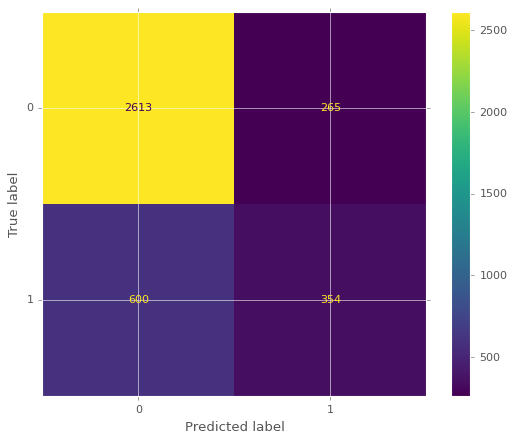

In [307]:
hr_model_test_cm = confusion_matrix(y_test, (hr_model_test_probs > 0.6).astype(y_train.dtype))
hr_model_test_display = ConfusionMatrixDisplay(hr_model_test_cm)
hr_model_test_display.plot()

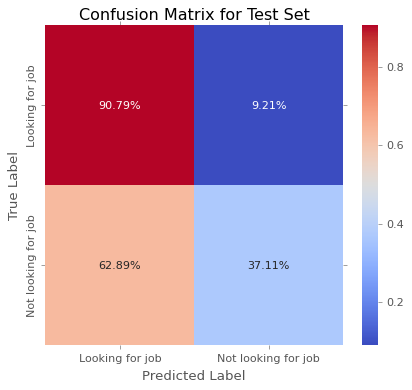

In [328]:
hr_model_test_cm = confusion_matrix(y_test, (hr_model_test_probs > 0.6).astype(y_train.dtype), normalize = "true")

labels = ["Looking for job", "Not looking for job"]

plt.figure(figsize=(6, 5))
sns.heatmap(hr_model_test_cm, annot=True, fmt='.2%', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()